In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, ensemble, svm, tree, neural_network

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
result = {}

In [3]:
hhids=[26, 59, 77, 86, 93, 94, 101, 114, 171, 187]


for hhid in hhids: 
    X=[]
    result[hhid] = []
    print('Start :: Process on household {}...'.format(hhid))
    df = pd.read_csv('data_filled2/processed_hhdata_{}_2.csv'.format(hhid), index_col=0)[0:8784]

    features = ['temperature', 'cloud_cover','wind_speed','month','hour']



    Y = list(df.AC)[168:]
    Y = np.array(Y)
    print(Y.shape)
    print(Y[0])
    
    #get X
    for index, row in df.iterrows():
        if index>=168:
            rowlist=row[features]
            rowlist = rowlist.tolist()
            X.append(rowlist)
            rowlist.append(df.use.iloc[index-1])
            rowlist.append(df.use.iloc[index-24])
            rowlist.append(df.use.iloc[index-168])



    X = np.array(X)
    print(X.shape)
    print(X[0])
    print(len(X[0]))
    


    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=0.10,
                                                        random_state=666)

    clf = tree.DecisionTreeRegressor(),
    clf.fit(X_train, Y_train)
    print(clf)
    print("Training finish")
    
    for i in range(len(X))
    
    yhat = clf.predict(X_test)
    scores = cross_val_score(clf, X_train, Y_train)
    rmse = np.sqrt(mean_squared_error(Y_test, yhat))
    nrmse = rmse/(df.AC.max()-df.AC.min())
    mae = mean_absolute_error(Y_test, yhat)
    print('RMSE =>', rmse)
    print('nRMSE =>', nrmse)
    print('MAE =>', mae)
    print('CV Score =>', scores)
    model_dict = {
        'name': clf.__class__.__name__,
        'rmse': rmse,
        'nrmse': nrmse,
        'mae': mae,
    }
    result[hhid].append(model_dict)
    print('')

Start :: Process on household 26...
(8285,)
0.0
(8285, 8)
[48.71        0.          5.15        1.         20.          0.92853333
  1.09866667  1.83546667]
8
Start :: Find the best model for this household...
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)
RMSE => 1.0738366734810871
nRMSE => 0.21476733469621742
MAE => 0.7975823445993879
CV Score => [0.13198732 0.10164137 0.12353006]

Lasso(alpha=0.55, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE => 1.1327828332174426
nRMSE => 0.2265565666434885
MAE => 0.8760221992759316
CV Score => [0.02654772 0.02815432 0.0190849 ]

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
RMSE => 1.073469

RMSE => 0.5781900416273812
nRMSE => 0.11563800832547624
MAE => 0.3179730207028494
CV Score => [0.72706715 0.73386163 0.75453345]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RMSE => 0.7764799351259984
nRMSE => 0.1552959870251997
MAE => 0.33290000873337544
CV Score => [0.55506949 0.51002836 0.54092976]

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
RMSE => 0.5618641422209084
nRMSE => 0.11237282844418169
MAE => 0.29877924900541
CV Score => [0.72074097 0.71470139 0.74669875]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RMSE => 0.7346719854352339
nRMSE => 0.14693439708704678
MAE => 0.297090372858283
CV Score => [0.5342974  0.52294901 0.5521032 ]

MLPRegressor(activation='relu', alpha=0.0001, batc

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
RMSE => 0.586450053347444
nRMSE => 0.11729001066948881
MAE => 0.3152136947127495
CV Score => [0.72344341 0.73619135 0.75253314]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RMSE => 0.7055909973870653
nRMSE => 0.14111819947741305
MAE => 0.30779962501544056
CV Score => [0.53972983 0.46479141 0.53155083]

MLPRegressor(activation='relu', alpha=0.0001, b

In [4]:
final = []
for k, v in result.items():
    for i in result[k]:
        final.append([str(k), i['name'], i['rmse'],i['nrmse'], i['mae']])
col = ['household_id', 'alg', 'RMSE','nRMSE', 'MAE']
final = pd.DataFrame(data=final, columns=col)
final.to_csv('GHI.csv')

In [5]:
final

,household_id,alg,RMSE,nRMSE,MAE
0,26,Ridge,1.073837,0.214767,0.797582
1,26,Lasso,1.132783,0.226557,0.876022
2,26,BayesianRidge,1.073470,0.214694,0.797293
3,26,LassoLars,1.147444,0.229489,0.907336
4,26,LinearRegression,1.073844,0.214769,0.797589
5,26,RandomForestRegressor,0.571268,0.114254,0.305383
6,26,DecisionTreeRegressor,0.781335,0.156267,0.329378
7,26,MLPRegressor,0.690492,0.138098,0.435968
8,59,Ridge,1.100736,0.220147,0.821794
9,59,Lasso,1.132783,0.226557,0.876022


In [6]:
gb = final.groupby('alg')

In [7]:
N = 9
ind = range(N)
mean = list(gb['nRMSE'].describe()['mean'])
mean.append(0.23297156073409236)
std = list(gb['nRMSE'].describe()['std'])
std.append(1.4433315687225568e-09)

In [8]:
print(mean, std)

[0.22099849734222615, 0.15029792205843345, 0.226415363396187, 0.2293589980620351, 0.22111784355829117, 0.14197294877831904, 0.11450110809671481, 0.22111658450016933, 0.23297156073409236] [0.0031237303603402454, 0.005686553437550824, 0.00044652387448480694, 0.00041039642777432637, 0.0031434985103364387, 0.006739157719709472, 0.002104196117743152, 0.003143604425165561, 1.4433315687225568e-09]


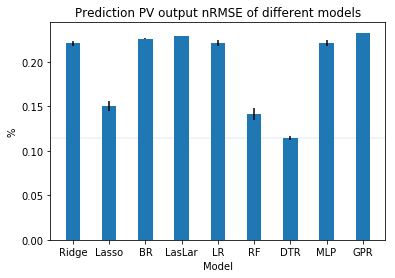

In [17]:
p1 = plt.bar(ind, mean, 0.4, yerr=std)

plt.ylabel('%')
plt.title('Prediction PV output nRMSE of different models')
#plt.ylim(0,0.3)
plt.xlabel('Model')
plt.xticks(ind, ('Ridge', 'Lasso','BR' ,'LasLar', 'LR', 'RF', 'DTR', 'MLP','GPR'))
# plt.yticks(np.arange(50, 2))
plt.axhline(y=gb['nRMSE'].describe()['mean']['RandomForestRegressor'], linewidth=0.15)
plt.savefig('ghi.png')